In [3]:
# import packages
import numpy as np
import pandas as pd
import sklearn as sl
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.float_format", lambda x: "%.3f" % x) # specify the float to three point

In [4]:
# load data
TV = pd.read_table("/Users/gege/Downloads/TVdata.txt", sep = ",", lineterminator = "\n")
TV.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.606,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.500,112.301,51,other award,PG-13,1.710
1,300175,270338.426,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.500,94.983,41,no award,R,3.250
2,361899,256165.867,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.300,115.764,58,other award,R,2.647
3,308314,196622.721,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.600,130.704,94,Oscar,R,1.667
4,307201,159841.652,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.400,105.546,37,other award,R,3.067


# explore the data

In [5]:
print(TV.shape)

(4226, 16)


In [6]:
TV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 16 columns):
video_id                         4226 non-null int64
cvt_per_day                      4226 non-null float64
weighted_categorical_position    4226 non-null int64
weighted_horizontal_poition      4226 non-null int64
import_id                        4226 non-null object
release_year                     4226 non-null int64
genres                           4226 non-null object
imdb_votes                       4226 non-null int64
budget                           4226 non-null int64
boxoffice                        4226 non-null int64
imdb_rating                      4226 non-null float64
duration_in_mins                 4226 non-null float64
metacritic_score                 4226 non-null int64
awards                           4226 non-null object
mpaa                             4226 non-null object
star_category                    4226 non-null float64
dtypes: float64(4), int64(8), obj

 There is no null in the data

In [7]:
TV.describe()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000
mean,280371.163,4218.630,7.783,28.104,2001.057,6462.924,2150743.439,2536338.472,5.257,89.556,15.974,0.955
std,112640.128,13036.080,6.134,11.864,17.497,31596.007,7176604.483,8243516.266,2.123,21.086,26.205,0.955
min,7909.000,2.188,1.000,1.000,1916.000,0.000,0.000,0.000,0.000,4.037,0.000,0.000
25%,285104.250,351.169,4.000,20.000,1998.000,81.000,0.000,0.000,4.300,82.602,0.000,0.000
50%,313891.500,1193.500,6.000,28.000,2008.000,535.000,0.000,0.000,5.800,90.730,0.000,1.000
75%,349345.750,3356.789,9.000,36.000,2012.000,3053.000,1500000.000,0.000,6.800,99.500,41.000,1.667
max,394880.000,307127.606,41.000,70.000,2017.000,948630.000,107000000.000,184208848.000,10.000,246.017,100.000,4.000


There are 4 variables have about 25% zeros in the data, which make no secse, like budget, boxoffice, metacritic_score and star_category, and for budget, boxoffice and metacritic_score, there are 50% 0, which are missing values.

In [8]:
# check duplicate data
if len(TV.set_index("video_id").index.get_duplicates()) == 0:
    print ("There is no duplicate data")

There is no duplicate data


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'get_duplicates' is deprecated and will be removed in a future release. You can use idx[idx.duplicated()].unique() instead
  


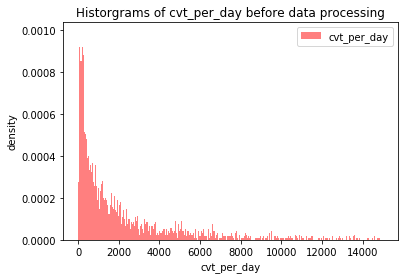

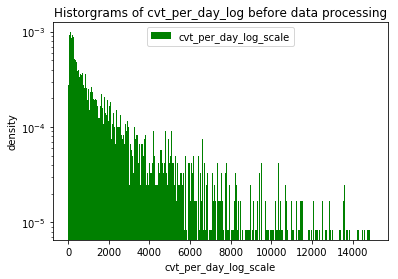

In [9]:
# see the predictive variable
plt.hist(TV["cvt_per_day"], bins = range(0, 15000, 30), color = "r", alpha = 0.5, density = True, label = "cvt_per_day")
plt.legend(loc = "upper right")
plt.title("Historgrams of cvt_per_day before data processing")
plt.xlabel("cvt_per_day")
plt.ylabel("density")
plt.show()

plt.hist(TV["cvt_per_day"], log = True, bins = range(0, 15000, 30), density = True, color = "g", label = "cvt_per_day_log_scale")
plt.legend(loc = "upper center")
plt.title("Historgrams of cvt_per_day_log before data processing")
plt.xlabel("cvt_per_day_log_scale")
plt.ylabel("density")
plt.show()

In [10]:
# see correlations
corr = TV[['cvt_per_day','weighted_categorical_position','weighted_horizontal_poition'
               ,'release_year', 'imdb_votes', 'budget', 'boxoffice' ,'imdb_rating', 
               'duration_in_mins', 'metacritic_score', 'star_category']].corr()
corr

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
cvt_per_day,1.000,-0.148,-0.302,0.046,0.298,0.316,0.312,0.059,0.152,0.249,0.247
weighted_categorical_position,-0.148,1.000,-0.084,-0.069,-0.064,-0.090,-0.074,-0.116,-0.174,-0.044,-0.123
weighted_horizontal_poition,-0.302,-0.084,1.000,0.027,-0.221,-0.211,-0.245,-0.162,-0.102,-0.255,-0.168
release_year,0.046,-0.069,0.027,1.000,-0.083,-0.040,-0.128,-0.199,-0.097,-0.167,-0.198
imdb_votes,0.298,-0.064,-0.221,-0.083,1.000,0.273,0.531,0.163,0.156,0.322,0.225
budget,0.316,-0.090,-0.211,-0.040,0.273,1.000,0.505,0.106,0.251,0.315,0.322
boxoffice,0.312,-0.074,-0.245,-0.128,0.531,0.505,1.000,0.164,0.226,0.465,0.322
imdb_rating,0.059,-0.116,-0.162,-0.199,0.163,0.106,0.164,1.000,0.344,0.347,0.192
duration_in_mins,0.152,-0.174,-0.102,-0.097,0.156,0.251,0.226,0.344,1.000,0.327,0.309
metacritic_score,0.249,-0.044,-0.255,-0.167,0.322,0.315,0.465,0.347,0.327,1.000,0.452


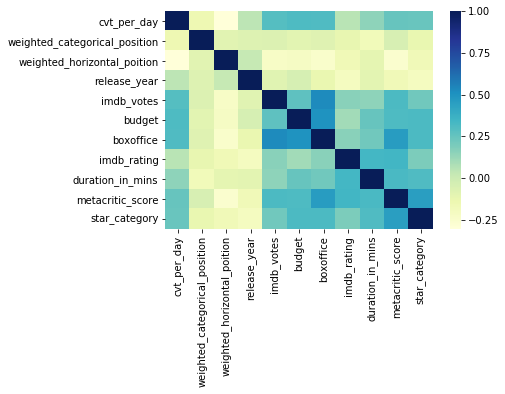

In [11]:
sns.heatmap(corr, cmap = "YlGnBu")

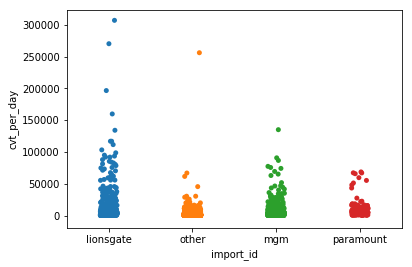

       index  import_id
0      other       2963
1  lionsgate        677
2        mgm        445
3  paramount        141


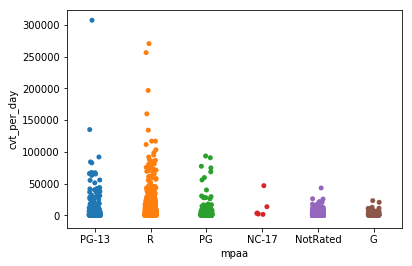

NotRated    2158
R           1158
PG-13        426
PG           353
G            125
NC-17          6
Name: mpaa, dtype: int64


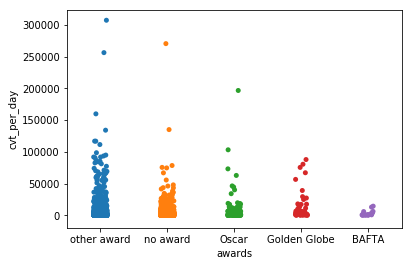

          index  awards
0      no award    2569
1   other award    1453
2         Oscar     141
3  Golden Globe      44
4         BAFTA      19


In [14]:
# see categorical variables
sns.stripplot(x = "import_id", y = "cvt_per_day", data = TV, jitter = True)
plt.show()
print(TV["import_id"].value_counts().reset_index())

sns.stripplot(x = "mpaa", y = "cvt_per_day", data = TV, jitter = True)
plt.show()
print(TV["mpaa"].value_counts())

sns.stripplot(x = "awards", y = "cvt_per_day", data = TV, jitter = True)
plt.show()
print(TV["awards"].value_counts().reset_index())


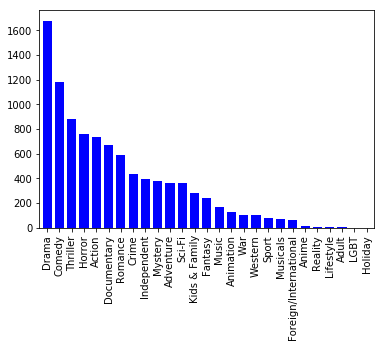

In [34]:
genres_dumy = TV["genres"].str.get_dummies(sep = ",").sum().sort_values(ascending = False)
genres_dumy.plot.bar(color = "b", width = 0.75)

6 genres including Anime, Reality, Lifestyle, Adult, LGBT, Holiday have low frequencies. Therefore, during feature processing, they will be grouped together as: 'Misc_gen' in the feature 'genres'.

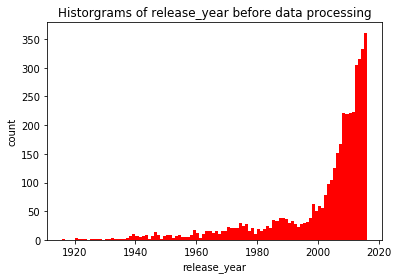

In [36]:
TV["release_year"].describe()
plt.hist(TV["release_year"], bins = range(1916, 2017, 1), color = "r")
plt.title("Historgrams of release_year before data processing")
plt.xlabel("release_year")
plt.ylabel("count")
plt.show()

# Feature Processing

Categorical features
There are 5 categorical features: import_id, mpaa, awards, genres, and release_year. There is no missing data in them. They can be converted into dummy/indicators.

The first 3 have relatively small sub-types, they can be easily converted to dummies.

The 'genres' have 27 different sub-types, 6 of them are rarely observed (refer to previous section). It's reasonable to group these 6 into 1. Note: a video may have more than one genre, in the feature preprocessing, all genres are handled individually.

The release_year is bined into 10 buckets based on the year range between 1917 and 2017.

In [37]:
# Convert 3 Categorical variables into dummy variables
d_import_id = pd.get_dummies(TV["import_id"]).astype(np.int)
d_mpaa = pd.get_dummies(TV["mpaa"]).astype(np.int)
d_awards = pd.get_dummies(TV["awards"]).astype(np.int)

In [42]:
# genres
d_genres = TV["genres"].str.get_dummies(sep = ",").astype(np.int)
d_genres["Misc_gen"] = d_genres['Anime']|d_genres['Reality']|d_genres['Lifestyle']|d_genres['Adult']|d_genres['LGBT']|d_genres['Holiday']
d_genres.drop(["Anime", "Reality", "Lifestyle", "Adult", "LGBT", "Holiday"], inplace = True, axis = 1)

In [44]:
# bin year
TV["release_year"].describe(percentiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
bin_year = [1916, 1974, 1991, 2001, 2006, 2008, 2010, 2012, 2013, 2014, 2017]
year_range = ['1916-1974', '1974-1991', '1991-2001', '2001-2006','2006-2008','2008-2010','2010-2012','2012-2013',
              '2013-2014','2014-2017']
year_bin = pd.cut(TV['release_year'], bin_year, labels=year_range)
d_year = pd.get_dummies(year_bin).astype(int)

In [52]:
TV_temp = TV.drop(["import_id", "mpaa", "awards", "genres", "release_year"], axis = 1)
newTV = pd.concat([TV_temp, d_import_id, d_mpaa, d_awards, d_genres, d_year], axis=1)
print(newTV.shape)
print(pd.isnull(newTV).any())
newTV_copy = newTV.copy()

(4226, 58)
video_id                         False
cvt_per_day                      False
weighted_categorical_position    False
weighted_horizontal_poition      False
imdb_votes                       False
budget                           False
boxoffice                        False
imdb_rating                      False
duration_in_mins                 False
metacritic_score                 False
star_category                    False
lionsgate                        False
mgm                              False
other                            False
paramount                        False
G                                False
NC-17                            False
NotRated                         False
PG                               False
PG-13                            False
R                                False
BAFTA                            False
Golden Globe                     False
Oscar                            False
no award                         False
other award   

In [53]:
newTV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 58 columns):
video_id                         4226 non-null int64
cvt_per_day                      4226 non-null float64
weighted_categorical_position    4226 non-null int64
weighted_horizontal_poition      4226 non-null int64
imdb_votes                       4226 non-null int64
budget                           4226 non-null int64
boxoffice                        4226 non-null int64
imdb_rating                      4226 non-null float64
duration_in_mins                 4226 non-null float64
metacritic_score                 4226 non-null int64
star_category                    4226 non-null float64
lionsgate                        4226 non-null int64
mgm                              4226 non-null int64
other                            4226 non-null int64
paramount                        4226 non-null int64
G                                4226 non-null int64
NC-17                            4226


Feature space holds 4226 observations and 58 features in total.

There is NO null data. newTV_0 is kepted as the raw dataframe before any further feature processing.

We will replace 0 with null, and then fill missing value etc.



# Handling of missing data

In [54]:
# replace 0 with nan, you should not use newTV = newTV.replace(), since after one_hot, a lot 0 which we should not replace with nan.
# we shouls see before precessing, which column has 0 and replace them
newTV[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']] = newTV[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']].replace(0, np.nan)
newTV.isnull().sum()

video_id                            0
cvt_per_day                         0
weighted_categorical_position       0
weighted_horizontal_poition         0
imdb_votes                        344
budget                           2454
boxoffice                        3194
imdb_rating                       344
duration_in_mins                    0
metacritic_score                 3012
star_category                    1846
lionsgate                           0
mgm                                 0
other                               0
paramount                           0
G                                   0
NC-17                               0
NotRated                            0
PG                                  0
PG-13                               0
R                                   0
BAFTA                               0
Golden Globe                        0
Oscar                               0
no award                            0
other award                         0
Action      

In [55]:
# fill missing values with mean value
newTV_copy1 = newTV.copy()
newTV["imdb_votes"].fillna(newTV["imdb_votes"].mean(), inplace = True)
newTV["budget"] .fillna(newTV["budget"].mean(), inplace = True)
newTV["boxoffice"] .fillna(newTV["boxoffice"].mean(), inplace = True)
newTV["imdb_rating"] .fillna(newTV["imdb_rating"].mean(), inplace = True)
newTV["metacritic_score"] .fillna(newTV["metacritic_score"].mean(), inplace = True)
newTV["star_category"] .fillna(newTV["star_category"].mean(), inplace = True)
newTV.isnull().sum()

video_id                         0
cvt_per_day                      0
weighted_categorical_position    0
weighted_horizontal_poition      0
imdb_votes                       0
budget                           0
boxoffice                        0
imdb_rating                      0
duration_in_mins                 0
metacritic_score                 0
star_category                    0
lionsgate                        0
mgm                              0
other                            0
paramount                        0
G                                0
NC-17                            0
NotRated                         0
PG                               0
PG-13                            0
R                                0
BAFTA                            0
Golden Globe                     0
Oscar                            0
no award                         0
other award                      0
Action                           0
Adventure                        0
Animation           

# Feature scaling


The impact of different scaling methods on the model performance is small. In the following model training and selections, the standard scaling (sc) data is used.

In [56]:
from sklearn import preprocessing
newTV_copy2 = newTV.copy()
scale_col = ['weighted_categorical_position', 'weighted_horizontal_poition', 'budget','boxoffice', 
             'imdb_votes','imdb_rating','duration_in_mins', 'metacritic_score','star_category']
sc_scale = sl.preprocessing.StandardScaler().fit(newTV[scale_col])
newTV[scale_col] = sc_scale.transform(newTV[scale_col])
newTV.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,...,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.606,-1.106,-2.116,1.984,1.470,4.696,0.542,1.079,-0.630,...,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426,-1.106,-2.116,1.258,1.470,-1.022,0.542,0.257,-1.997,...,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867,-1.106,-2.116,6.043,3.108,3.898,1.100,1.243,0.327,...,0,0,0,0,0,0,1,0,0,0
3,308314,196622.721,-0.780,-2.032,11.077,1.470,0.767,1.309,1.952,5.250,...,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652,-1.106,-2.116,1.258,3.290,-0.265,0.472,0.758,-2.544,...,0,0,0,0,0,0,0,1,0,0


# Model train

In [57]:
# split train and test data
from sklearn.model_selection import train_test_split   
train_data, test_data = train_test_split(newTV, test_size = 0.15, random_state = 3)
train_data_x = train_data.drop(["video_id", "cvt_per_day"], axis = 1)
train_data_y = train_data["cvt_per_day"]
test_data_x = test_data.drop(["video_id", "cvt_per_day"], axis = 1)
test_data_y = test_data["cvt_per_day"]

In [58]:
# split train data to train and valid data
la_train_x, la_valid_x, la_train_y, la_valid_y = train_test_split(train_data_x, train_data_y, test_size = 0.15, random_state = 0)

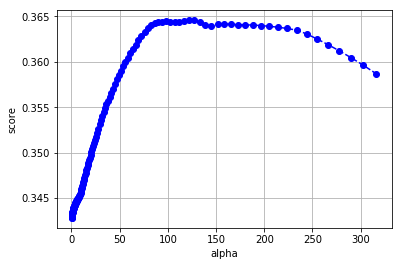

The optimal alpha and score is : 122.06107238906554 0.36457853302954235


In [59]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
alpha = np.logspace(-0.3, 2.5, 150)
score = np.empty_like(alpha)
max_score = float("-inf")
opt_a = float("-inf")
for i, a in enumerate(alpha):
    lasso = Lasso(alpha = a)
    lasso.fit(la_train_x, la_train_y)
    score[i] = lasso.score(la_valid_x, la_valid_y)
    if score[i] > max_score:
        opt_a = a
        max_score = score[i]
        lasso_save = lasso
plt.plot(alpha, score, marker = "o", color = "b", linestyle = "dashed")
plt.xlabel("alpha")
plt.ylabel("score")
plt.grid(True)
plt.show()
print("The optimal alpha and score is :", opt_a, max_score)

In [67]:
# combine the validate data and training data, use the optimal alpha, re-train the model
lasso_f = Lasso()
lasso_f.set_params(alpha = opt_a)
lasso_f.fit(train_data_x, train_data_y)
# lasso_f is the Lasso model (linear feature), to be tested with final test data.

Lasso(alpha=122.06107238906554, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

2) Polynomial features


In [68]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)

po_train_x, po_valid_x, po_train_y, po_valid_y = train_test_split(train_data_x, train_data_y, test_size = 0.15, random_state = 0)
po_train_xp = poly.fit_transform(po_train_x)
po_valid_xp = poly.fit_transform(po_valid_x)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32955562904.80983, tolerance: 48022560.445868395
  positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32966202289.15302, tolerance: 48022560.445868395
  positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32979663841.27658, tolerance: 48022560.445868395
  positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32996615902.6

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47545445761.32447, tolerance: 48022560.445868395
  positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36259488323.377075, tolerance: 48022560.445868395
  positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16906238264.156868, tolerance: 48022560.445868395
  positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4338710964.

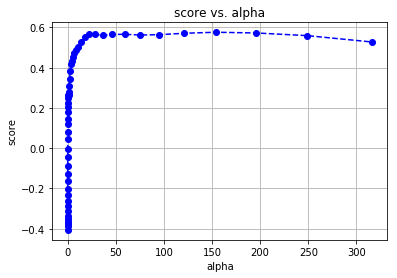

The optimaized alpha and score of Lasso polynomial is:  154.08313356160554 0.5764034433704796


In [71]:
alphas = np.logspace (-2.6, 2.5, num=50)
# alphas= [1]
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    lasso = Lasso()
    lasso.set_params(alpha = a)
    lasso.fit(po_train_xp, po_train_y)
    scores[i] = lasso.score(po_valid_xp, po_valid_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        lasso_save = lasso
        
plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimaized alpha and score of Lasso polynomial is: ', opt_a, max_score)

In [72]:
# combine the validate data and training data, use the optimal alpha, re-train the model
train_data_xp = poly.fit_transform(train_data_x)
lasso_fp = Lasso(alpha = opt_a)
lasso_fp.fit(train_data_xp, train_data_y)
# lasso_fp is the Lasso model (polynomial feature), to be tested with test data.

Lasso(alpha=154.08313356160554, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge linear regression


In [73]:
ri_train_x, ri_valid_x, ri_train_y, ri_valid_y = train_test_split(train_data_x, train_data_y, test_size = 0.15, random_state = 0)

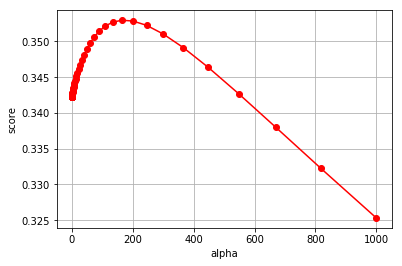

The optimaized alpha and score of Ridge polynomial is:  163.97026580002054 0.3529604309849166


In [74]:
alphas = np.logspace(-10, 3, num = 150)
scores = np.empty_like(alphas)
opt_a = float("-inf")
max_score = float("-inf")
for i, a in enumerate(alphas):
    ridge = Ridge(alpha = a)
    ridge.fit(ri_train_x, ri_train_y)
    scores[i] = ridge.score(ri_valid_x, ri_valid_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge
plt.plot(alphas, scores, color = "r", marker = "o")
plt.xlabel("alpha")
plt.ylabel("score")
plt.grid(True)
plt.show()
print("The optimaized alpha and score of Ridge polynomial is: ", opt_a, max_score)

In [76]:
# add the 15% validate data, use the optimal alpha, re-train the model
ridge_f = Ridge(alpha = opt_a)
ridge_f.fit(train_data_x, train_data_y)
# ridge_f is the Ridge model (linear feature), to be tested with test data.

Ridge(alpha=163.97026580002054, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

2) Polynomial featuers


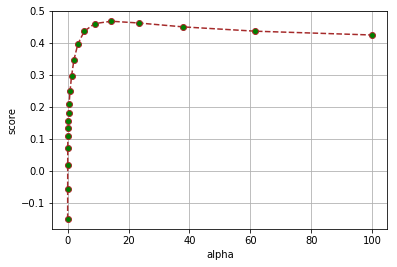

14.38449888287663 0.46816918700194055


In [77]:
# Use the same training data set as Lasso (polynomial features)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)

lr_train, lr_valid = train_test_split(train_data, test_size=0.15, random_state = 0)

lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_valid_x = lr_valid.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_train_y = lr_train['cvt_per_day']
lr_valid_y = lr_valid['cvt_per_day']

lr_train_xp = poly.fit_transform(lr_train_x)
lr_valid_xp = poly.fit_transform(lr_valid_x)

alphas = np.logspace (-2, 2, num=20)
# alphas= [1]
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    ridge = Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(lr_train_xp, lr_train_y)
    scores[i] = ridge.score(lr_valid_xp, lr_valid_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge
        
plt.plot(alphas, scores, color='brown', linestyle='dashed', marker='o',markerfacecolor='g', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.show()
print (opt_a, max_score)


In [78]:
# add the 15% validate data, use the optimal alpha, re-train the model
lr_train_xp = poly.fit_transform(train_data_x)

ridge_fp = Ridge()
ridge_fp.set_params(alpha = opt_a)
ridge_fp.fit(lr_train_xp, train_data_y)

# ridge_fp is the Ridge model (polynomial feature), to be tested with test data.

Ridge(alpha=14.38449888287663, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

# Non-linear model
Random forest with Gridsearch cross-validation is used. The 'mean_scores' is used to narrow down the paramenters of n_estimator (number of trees in the forest) and Max_depth (maximum depth of the tree).

In [90]:
rf_train_x, rf_valid_x, rf_train_y, rf_valid_y = train_test_split(train_data_x, train_data_y, test_size = 0.15, random_state = 0)

In [91]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

grid_param = {
                 'n_estimators': [54, 55, 56, 57, 58, 59, 60, 62],
                 'max_depth': [12, 13, 14, 15, 16, 17]
             }
rf = RandomForestRegressor(random_state = 2, max_features = "sqrt")
rf.grid = GridSearchCV(rf, grid_param, cv = 5)
rf.grid.fit(rf_train_x, rf_train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='sqrt',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=2,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [12, 13, 14, 15, 16, 

In [92]:
rf.grid.best_params_

{'max_depth': 14, 'n_estimators': 55}

In [93]:
rf.grid.cv_results_

{'mean_fit_time': array([0.15693359, 0.1508472 , 0.15464249, 0.1565289 , 0.16641226,
        0.16341467, 0.16402092, 0.17047014, 0.15841084, 0.16108088,
        0.17343707, 0.17338099, 0.17338314, 0.17682672, 0.18164105,
        0.1924448 , 0.17533984, 0.17413888, 0.17472887, 0.17775478,
        0.18023534, 0.1911622 , 0.18844581, 0.1930572 , 0.17714562,
        0.18352985, 0.18858914, 0.19008679, 0.19052634, 0.19552107,
        0.19808164, 0.20572491, 0.19048376, 0.19038262, 0.19406576,
        0.21333165, 0.202531  , 0.20838861, 0.20855217, 0.21545935,
        0.19805746, 0.2172709 , 0.20741172, 0.20724192, 0.2174376 ,
        0.21414924, 0.21786346, 0.22466159]),
 'mean_score_time': array([0.00919833, 0.00904918, 0.00924654, 0.00960155, 0.01093078,
        0.00971317, 0.0097682 , 0.01022139, 0.0093049 , 0.00980058,
        0.01011138, 0.01018419, 0.01014991, 0.01072507, 0.01058583,
        0.01088257, 0.01003795, 0.00999537, 0.0100153 , 0.0101368 ,
        0.01029725, 0.01115465, 0.

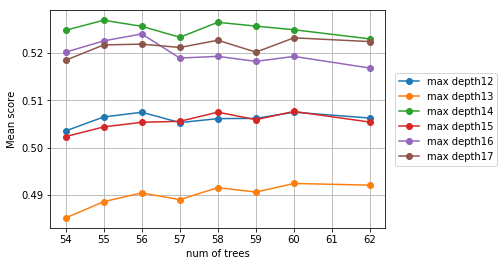

In [94]:
scores = rf.grid.cv_results_["mean_test_score"]
n_est = [54, 55, 56, 57, 58, 59, 60, 62]
m_depth = [12, 13, 14, 15, 16, 17]
scores = np.array(scores).reshape(len(m_depth), len(n_est))
plt.figure()
plt.subplot(111)
for i, a in enumerate(m_depth):
    plt.plot(n_est, scores[i], marker = "o", label = "max depth" + str(a))
plt.legend(loc = "center right", bbox_to_anchor = (1.35, 0.5))
plt.xlabel('num of trees')
plt.ylabel('Mean score')
plt.grid(True)
plt.show()

In [97]:
rf = RandomForestRegressor(random_state=2, max_features = 'sqrt', max_depth= 14, n_estimators=55)
rf.fit(train_data_x, train_data_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=55,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

# Model Evaluation
Test data is the reserved 15% of the whole dataset, and has never been seen by the above models.

 Lasso test with linear features (lasso_f)

In [98]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [99]:
lasso_f_score = lasso_f.score(test_data_x, test_data_y)
pred_y = lasso_f.predict(test_data_x)
MSE_lasso_f = mean_squared_error(test_data_y, pred_y)
RMSE_lasso_f = sqrt(mean_squared_error(test_data_y, pred_y))
print ('lasso_f score: ', lasso_f_score)
print ('Mean square error of lasso_f: ', MSE_lasso_f)
print ('Root mean squared error of lasso_f:', RMSE_lasso_f)

lasso_f score:  0.09954927178753703
Mean square error of lasso_f:  238953191.99910036
Root mean squared error of lasso_f: 15458.110880670392


In [100]:
test_data_xp = poly.fit_transform(test_data_x)
lasso_fp_score = lasso_fp.score(test_data_xp, test_data_y)
pred_y = lasso_fp.predict(test_data_xp)
MSE_lasso_fp = mean_squared_error(test_data_y, pred_y)
RMSE_lasso_fp = sqrt(mean_squared_error(test_data_y, pred_y))
print ('lasso_fp score: ', lasso_fp_score)
print ('Mean square error of lasso_fp: ', MSE_lasso_fp)
print ('Root mean squared error of lasso_fp:', RMSE_lasso_fp)

lasso_fp score:  -0.08248456394473869
Mean square error of lasso_fp:  287259628.6948835
Root mean squared error of lasso_fp: 16948.735312550125


In [101]:
ridge_f_score = ridge_f.score(test_data_x, test_data_y)
pred_y = ridge_f.predict(test_data_x)
MSE_ridge_f = mean_squared_error(test_data_y, pred_y)
RMSE_ridge_f = sqrt(mean_squared_error(test_data_y, pred_y))
print ('ridge_f score: ', ridge_f_score)
print ('Mean square error of ridge_f: ', MSE_ridge_f)
print ('Root mean squared error of ridge_f:', RMSE_ridge_f)

ridge_f score:  0.11371374943726777
Mean square error of ridge_f:  235194355.4060953
Root mean squared error of ridge_f: 15336.047580980417


In [102]:
test_data_xp = poly.fit_transform(test_data_x)
ridge_fp_score = ridge_fp.score(test_data_xp, test_data_y)
pred_y = ridge_fp.predict(test_data_xp)
MSE_ridge_fp = mean_squared_error(test_data_y, pred_y)
RMSE_ridge_fp = sqrt(mean_squared_error(test_data_y, pred_y))
print ('lasso_fp score: ', ridge_fp_score)
print ('Mean square error of lasso_fp: ', MSE_ridge_fp)
print ('Root mean squared error of lasso_fp:', RMSE_ridge_fp)

lasso_fp score:  0.3803378913673554
Mean square error of lasso_fp:  164440134.45644775
Root mean squared error of lasso_fp: 12823.421324141531


In [103]:
rf_score = rf.score(test_data_x, test_data_y)
pred_y = rf.predict(test_data_x)
MSE_rf = mean_squared_error(test_data_y, pred_y)
RMSE_rf = sqrt(mean_squared_error(test_data_y, pred_y))

# The mean squared error and root mean square error
print ('rf score: ', rf_score)
print ('Mean square error of rf: ', MSE_rf)
print ('Root mean squared error of rf:', RMSE_rf)

rf score:  0.5165772811589044
Mean square error of rf:  128286199.49175872
Root mean squared error of rf: 11326.349786747658


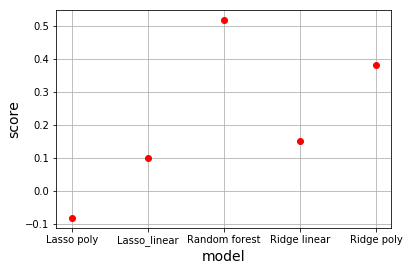

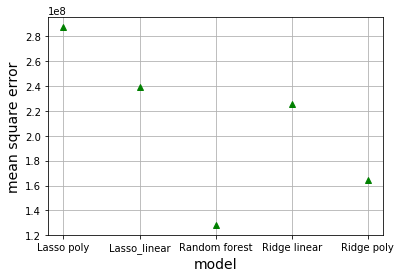

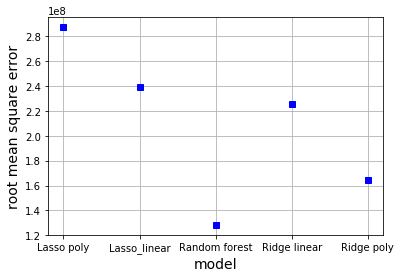

In [696]:
lst_score = [lasso_f_score, lasso_fp_score, ridge_f_score, ridge_fp_score, rf_score]
MSE_lst =  [MSE_lasso_f, MSE_lasso_fp, MSE_ridge_f, MSE_ridge_fp, MSE_rf]
RMSE_lst =  [RMSE_lasso_f, RMSE_lasso_fp, RMSE_ridge_f, RMSE_ridge_fp, RMSE_rf]
model_lst = ['Lasso_linear','Lasso poly', 'Ridge linear', 'Ridge poly', 'Random forest']

plt.figure(1)
plt.plot(model_lst, lst_score, "ro")
plt.grid(True)
plt.xlabel("model", fontsize = 14)
plt.ylabel("score", fontsize = 14)
plt.show()

plt.figure(2)
plt.plot(model_lst, MSE_lst, "g^")
plt.grid(True)
plt.xlabel("model", fontsize = 14)
plt.ylabel("mean square error", fontsize = 14)
plt.show()

plt.figure(3)
plt.plot(model_lst, MSE_lst, "bs")
plt.grid(True)
plt.xlabel("model", fontsize = 14)
plt.ylabel("root mean square error", fontsize = 14)
plt.show()

# Feature importance
Random forest(RF) shows the best prediction accuracy. Therefore, the feature importance will be extracted from the RF model.

In [104]:
importance = rf.feature_importances_

In [105]:
importance

array([1.51490037e-01, 1.12314143e-01, 1.33391332e-01, 7.05954914e-02,
       5.12963171e-02, 2.79199294e-02, 3.98155633e-02, 6.00266679e-02,
       5.17499473e-02, 3.62082547e-02, 1.97686622e-02, 3.05173748e-02,
       3.32188636e-03, 2.74275307e-04, 5.27576947e-04, 5.96008239e-03,
       2.50105747e-03, 5.24340645e-03, 1.39465901e-02, 4.57553344e-05,
       5.23285775e-03, 3.93795970e-03, 7.11562449e-03, 9.50021051e-03,
       4.57518402e-03, 2.10759759e-03, 2.15016041e-03, 6.64071860e-03,
       1.34256504e-02, 4.37903200e-03, 6.78164716e-03, 1.85935762e-03,
       5.13772598e-05, 3.23628744e-03, 4.85407878e-04, 4.54870865e-03,
       2.39017008e-03, 6.02881743e-04, 6.95789278e-03, 3.20104030e-03,
       2.48125035e-03, 1.48270609e-03, 9.12754313e-03, 3.11108386e-03,
       4.43634865e-03, 2.45580872e-05, 2.19621968e-03, 3.16093562e-03,
       5.51056736e-03, 1.05421014e-02, 6.12743554e-03, 4.96058464e-03,
       1.57198365e-02, 1.90514449e-02, 3.23126586e-03, 2.74200195e-03])

In [700]:
indices = np.argsort(importance)[::-1]
indices

array([ 0,  2,  1,  3,  7,  8,  4,  6,  9, 11,  5, 10, 53, 52, 18, 28, 49,
       23, 42, 22, 38, 30, 27, 50, 15, 48, 17, 20, 51, 24, 35, 44, 29, 21,
       12, 33, 54, 39, 47, 43, 55, 16, 40, 36, 46, 26, 25, 31, 41, 37, 14,
       34, 13, 32, 19, 45])

In [699]:
#std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
#std

In [701]:
feature_name = train_data_x.columns.get_values()
feature_name

array(['weighted_categorical_position', 'weighted_horizontal_poition',
       'imdb_votes', 'budget', 'boxoffice', 'imdb_rating',
       'duration_in_mins', 'metacritic_score', 'star_category',
       'lionsgate', 'mgm', 'other', 'paramount', 'G', 'NC-17', 'NotRated',
       'PG', 'PG-13', 'R', 'BAFTA', 'Golden Globe', 'Oscar', 'no award',
       'other award', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Foreign/International', 'Horror', 'Independent', 'Kids & Family',
       'Music', 'Musicals', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western', 'Misc_gen', '1916-1974', '1974-1991',
       '1991-2001', '2001-2006', '2006-2008', '2008-2010', '2010-2012',
       '2012-2013', '2013-2014', '2014-2017'], dtype=object)

In [702]:
for f in range(train_data_x.shape[1]):
    print ("%d. feature %s (%f)" %(f + 1, feature_name[indices[f]], importance[indices[f]]))

1. feature weighted_categorical_position (0.151490)
2. feature imdb_votes (0.133391)
3. feature weighted_horizontal_poition (0.112314)
4. feature budget (0.070595)
5. feature metacritic_score (0.060027)
6. feature star_category (0.051750)
7. feature boxoffice (0.051296)
8. feature duration_in_mins (0.039816)
9. feature lionsgate (0.036208)
10. feature other (0.030517)
11. feature imdb_rating (0.027920)
12. feature mgm (0.019769)
13. feature 2012-2013 (0.019051)
14. feature 2010-2012 (0.015720)
15. feature R (0.013947)
16. feature Crime (0.013426)
17. feature 2001-2006 (0.010542)
18. feature other award (0.009500)
19. feature Thriller (0.009128)
20. feature no award (0.007116)
21. feature Mystery (0.006958)
22. feature Drama (0.006782)
23. feature Comedy (0.006641)
24. feature 2006-2008 (0.006127)
25. feature NotRated (0.005960)
26. feature 1991-2001 (0.005511)
27. feature PG-13 (0.005243)
28. feature Golden Globe (0.005233)
29. feature 2008-2010 (0.004961)
30. feature Action (0.004575)

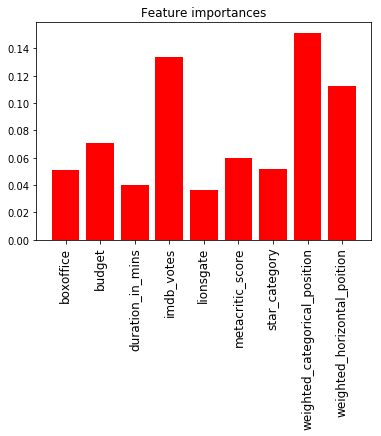

In [703]:
plt.figure()
plt.bar(feature_name[indices[0:9]], importance[indices[0:9]],
       color="r", align="center")
plt.title("Feature importances")
plt.xticks(rotation = 90, fontsize = 12)
plt.show()